# data processing:
## installing and importing needed python library's, and the data:

In [3]:
import sys
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
import pandas as pd 
import numpy as np
import scipy.special


url = "https://docs.google.com/spreadsheets/d/1H-2dgSCb3EgCMEgXDOtoJ5ol9Lt1lmAeXistsCpbJ44/export?format=csv&gid=0"

df = pd.read_csv(url)
print (df)

        naam    achternaam  leeftijd      Klas  reactiesnelheid kleur  \
0       Roef      de Groot        15       h4d                    254   
1      Elaya  van Woggelum        16       h4b                    413   
2       Ties        Koster        16       h5c                    351   
3       Marc         Leroy        16       h5c                    291   
4       Leon      Sleurink        32    docent                    255   
5     Lyanne         Ykema        17       h5c                    277   
6      Johan  van Heuzelen        42  top klas                    343   
7     Vesper    Rijsenbrij        14      AT3O                    208   
8    Madhura    Mahashabde        14      AT3n                    326   
9      Jayda          Tjin        15       H4a                    205   
10       Isa        Schrik        17       v6b                    348   
11  Jessica       bremmers        32    docent                    408   
12    Khalid        Gerash        18       V6b     

## making function to calculate correlation and p-value, to be used by graphs

In [29]:
def numberWithoutRounding(num, precision=3):
    [beforeDecimal, afterDecimal] = str(num).split('.')
    return beforeDecimal + '.' + afterDecimal[0:precision]

def corrsys(df):
    mask = df.notna().to_numpy()
    corr = df.corr().to_numpy()
    n_rows, n_cols = df.shape

    # Initialize the return arrays for better performance
    length = int(n_cols * (n_cols - 1) / 2)
    correl = np.empty(length, dtype=np.float64)
    count = np.empty(length, dtype=np.uint64)

    # For 2-combination of columns, let `n` be the number of pairs whose
    # elements are all non-NaN. We will need that later to calculate the
    # p-value
    k = -1
    for i in range(n_cols):
        for j in range(i):
            n = 0
            for row in range(n_rows):
                n += 1 if mask[row, i] and mask[row, j] else 0

            k += 1
            correl[k] = corr[i,j]
            count[k] = n
            

    # The p-value can be obtained with the incomplete Beta function (betainc)
    alpha = count / 2 - 1
    x = (correl + 1) / 2
    x = np.where(correl < 0, x, 1 - x)
    p = 2 * scipy.special.betainc(alpha, alpha, x)

    return(correl[0], p[0])

## visualising:
### plotting the scatterplots:


Text(0, 0.5, 'rondetijden (seconden)')

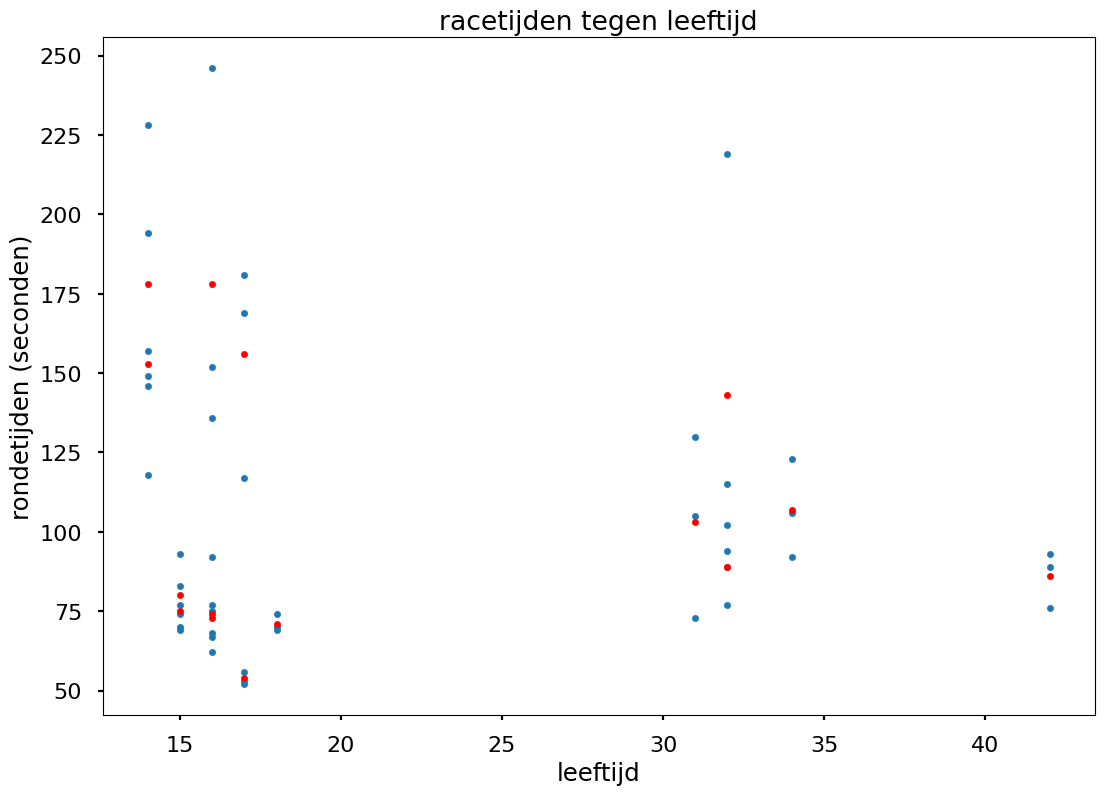

In [4]:
ax = df.plot(kind = "scatter", y = "ronde tijd 1", x = "leeftijd", title = "racetijden tegen leeftijd")
ax2 = df.plot(kind = "scatter", y = "ronde tijd 2", x = "leeftijd", ax = ax)
ax3 = df.plot(kind = "scatter", y = "ronde tijd 3", x = "leeftijd", ax = ax)
ax4 = df.plot(kind = "scatter", y = "avg tijd", x = "leeftijd", ax = ax, color = "r")
ax.set_ylabel("rondetijden (seconden)")

Text(0, 0.5, 'Reactiesnelheid (milliseconden)')

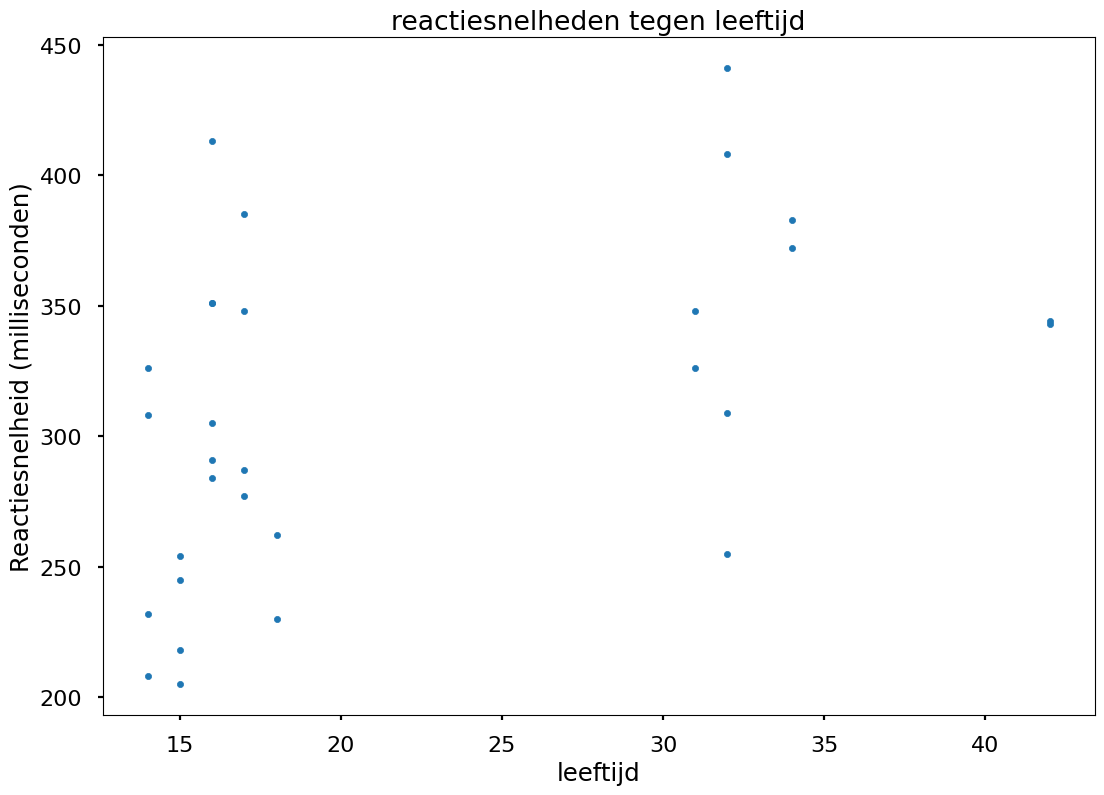

In [5]:
ax = df.plot(kind = "scatter", y = "reactiesnelheid kleur", x = "leeftijd", title = "reactiesnelheden tegen leeftijd")
ax2 = df.plot(kind = "scatter", y = "reactiesnelheid geluid", x = "leeftijd", ax = ax)
ax.set_ylabel("Reactiesnelheid (milliseconden)")

Text(0.5, 0, 'Reactiesnelheid (milliseconden)')

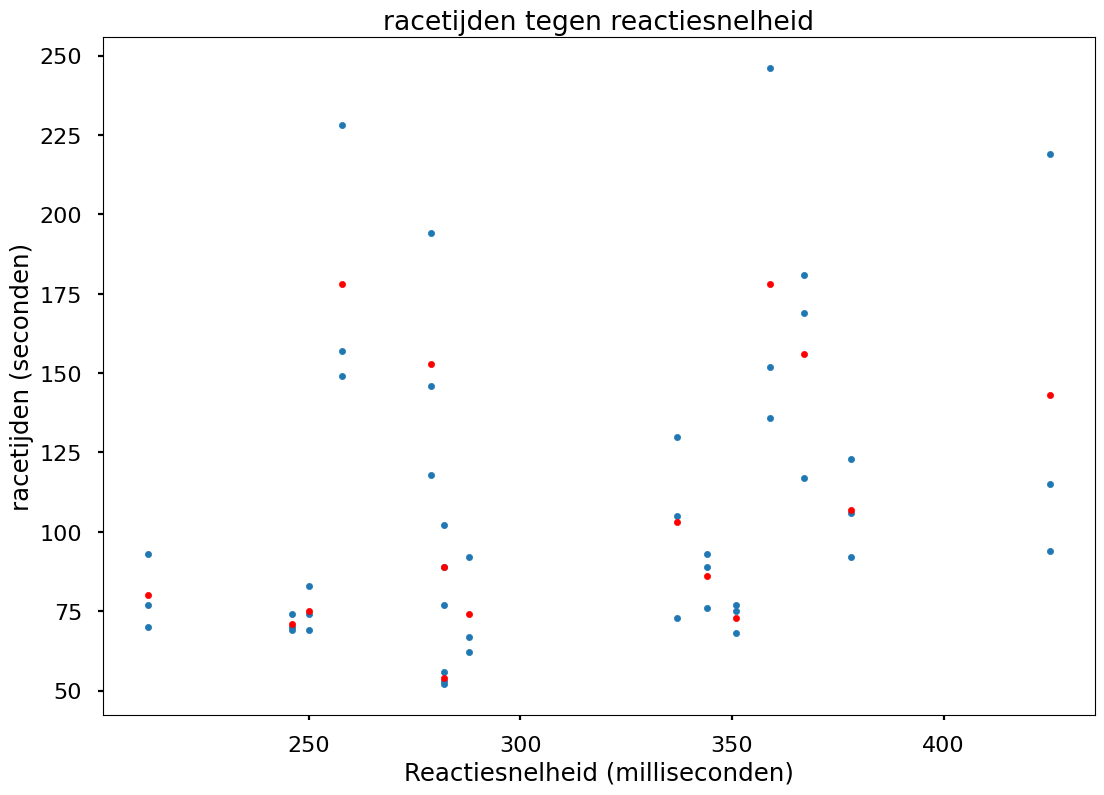

In [6]:
ax = df.plot(kind = "scatter", y = "ronde tijd 1", x = "rea gem", title = "racetijden tegen reactiesnelheid")
ax2 = df.plot(kind = "scatter", y = "ronde tijd 2", x = "rea gem", ax = ax)
ax3 = df.plot(kind = "scatter", y = "ronde tijd 3", x = "rea gem", ax = ax)
ax4 = df.plot(kind = "scatter", y = "avg tijd", x = "rea gem", ax = ax, color = "r")
ax.set_ylabel("racetijden (seconden)")
ax.set_xlabel("Reactiesnelheid (milliseconden)")

Text(0.5, 0, 'Reactiesnelheid (milliseconden)')

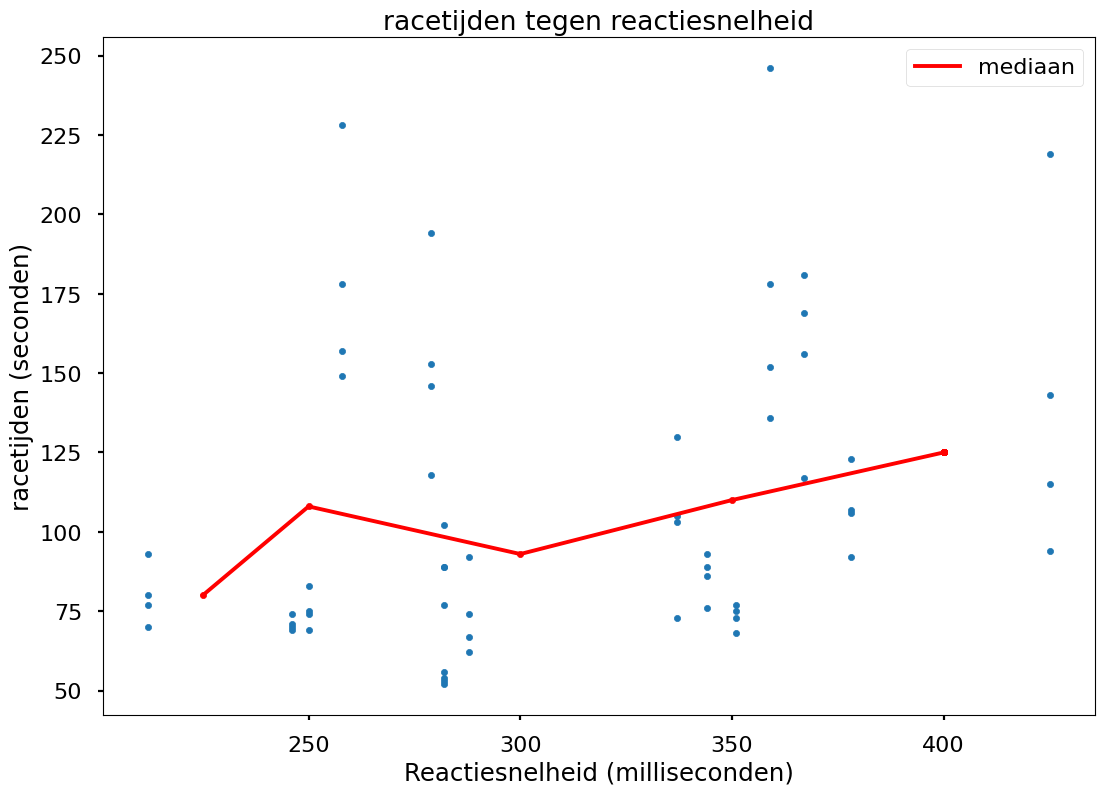

In [7]:
# padding om te zorgen dat er geen error komt
df["X"] = [225, 250, 300, 350, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400]
df["mediaan"] = [80, 108, 93, 110, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125]

ax = df.plot(kind = "scatter", y = "ronde tijd 1", x = "rea gem", title = "racetijden tegen reactiesnelheid")
ax2 = df.plot(kind = "scatter", y = "ronde tijd 2", x = "rea gem", ax = ax)
ax3 = df.plot(kind = "scatter", y = "ronde tijd 3", x = "rea gem", ax = ax)
ax4 = df.plot(kind = "scatter", y = "avg tijd", x = "rea gem", ax = ax)
ax5 = df.plot(kind = "scatter", y = "mediaan", x = "X", ax = ax, color = "r")
ax6 = df.sort_values(by="X").plot(kind = "line", y = "mediaan", x = "X", ax = ax, color = "r")
ax.set_ylabel("racetijden (seconden)")
ax.set_xlabel("Reactiesnelheid (milliseconden)")

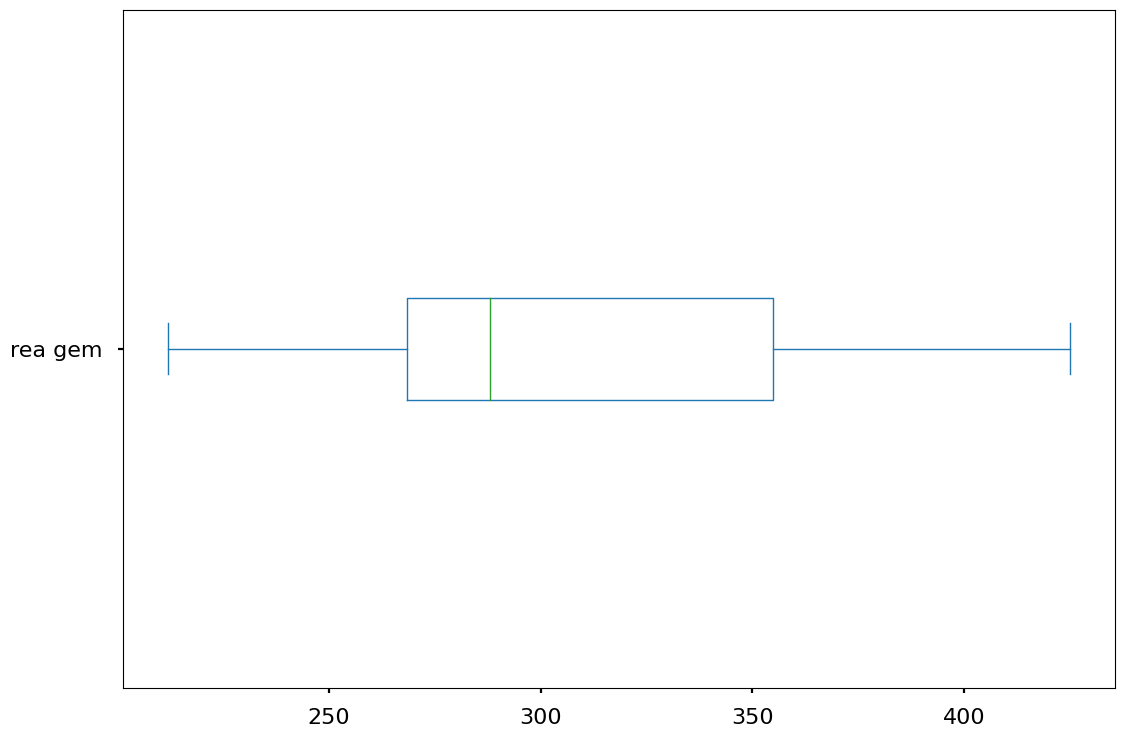

In [8]:
ax = df.plot(kind="box",y="rea gem", vert=False)

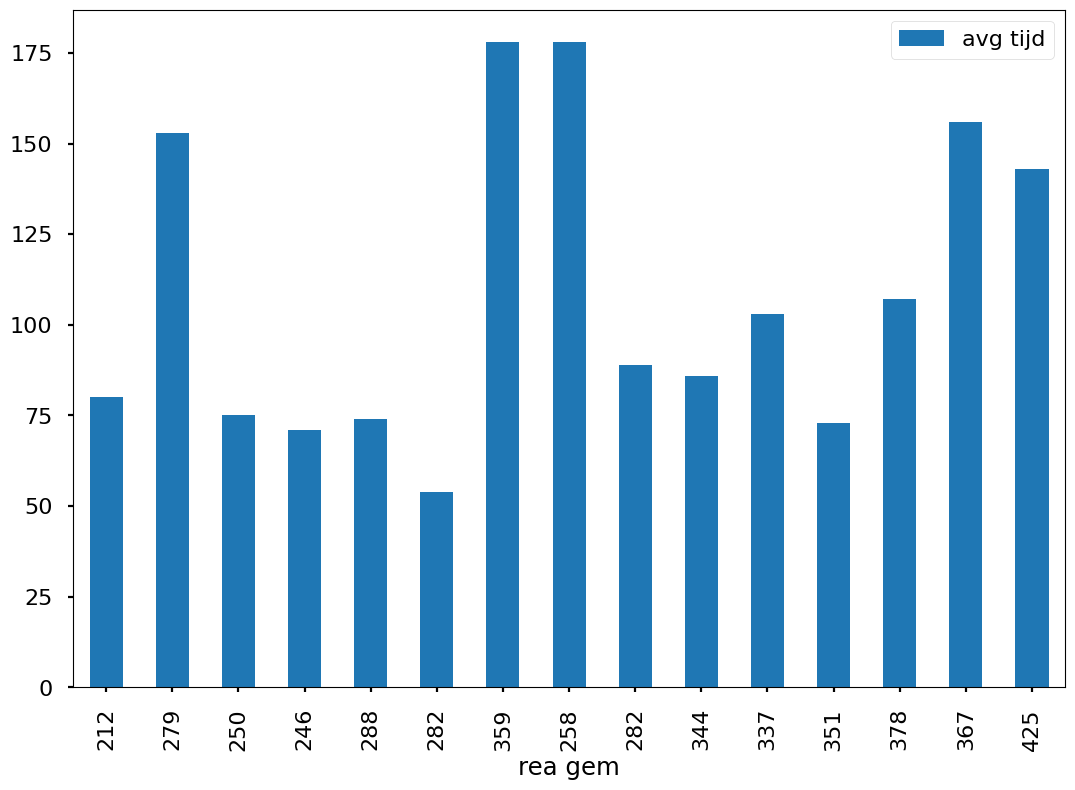

In [9]:
ax = df.sort_values(by="reactiesnelheid geluid").plot(kind="bar",y="avg tijd", x="rea gem")

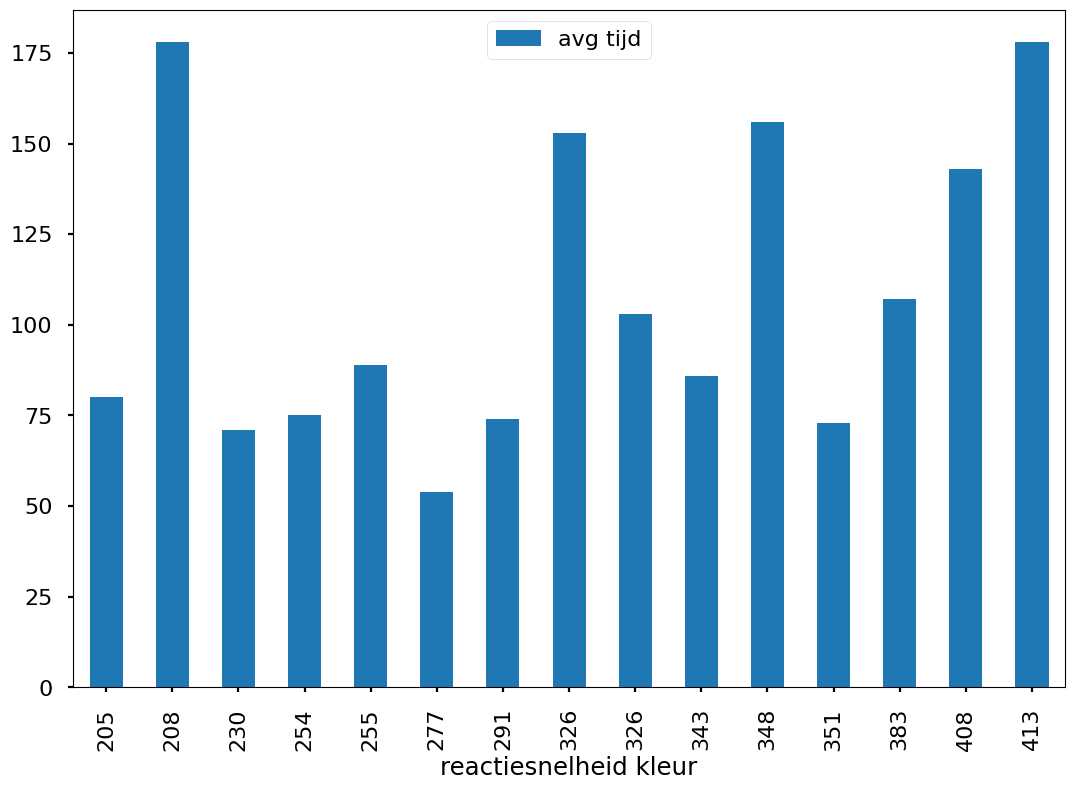

In [10]:
ax = df.sort_values(by="reactiesnelheid kleur").plot(kind="bar",y="avg tijd", x="reactiesnelheid kleur")

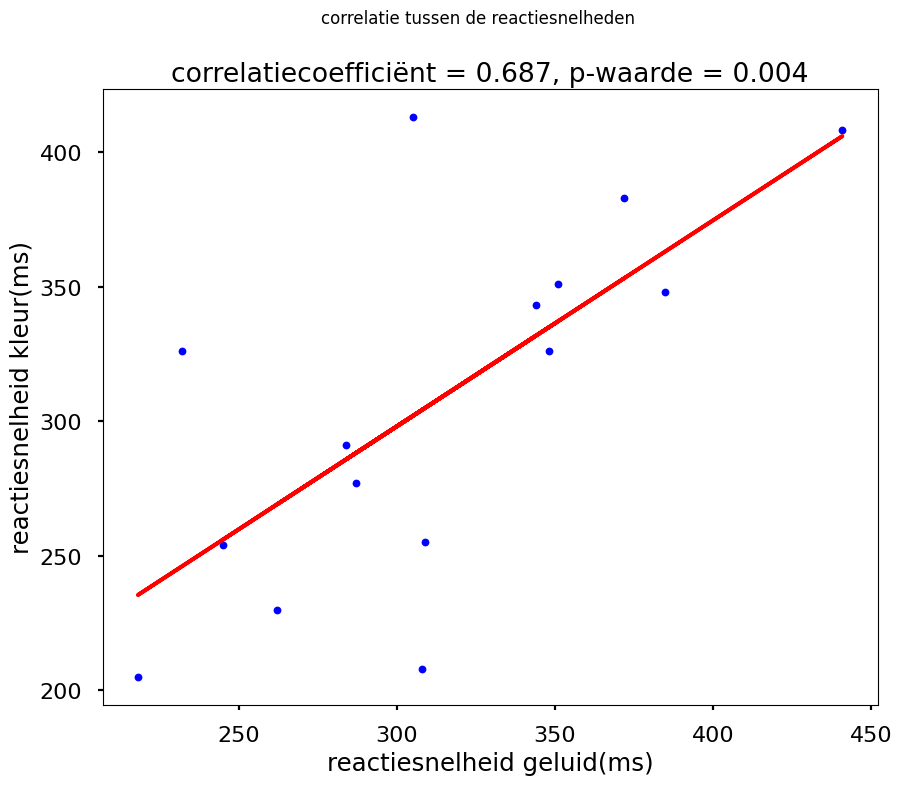

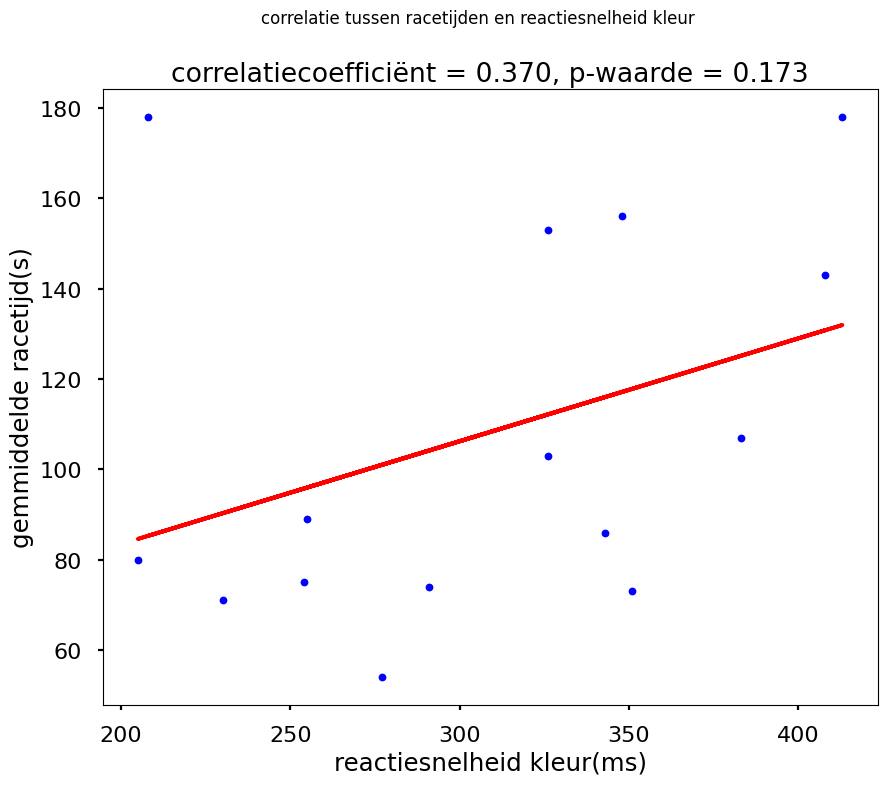

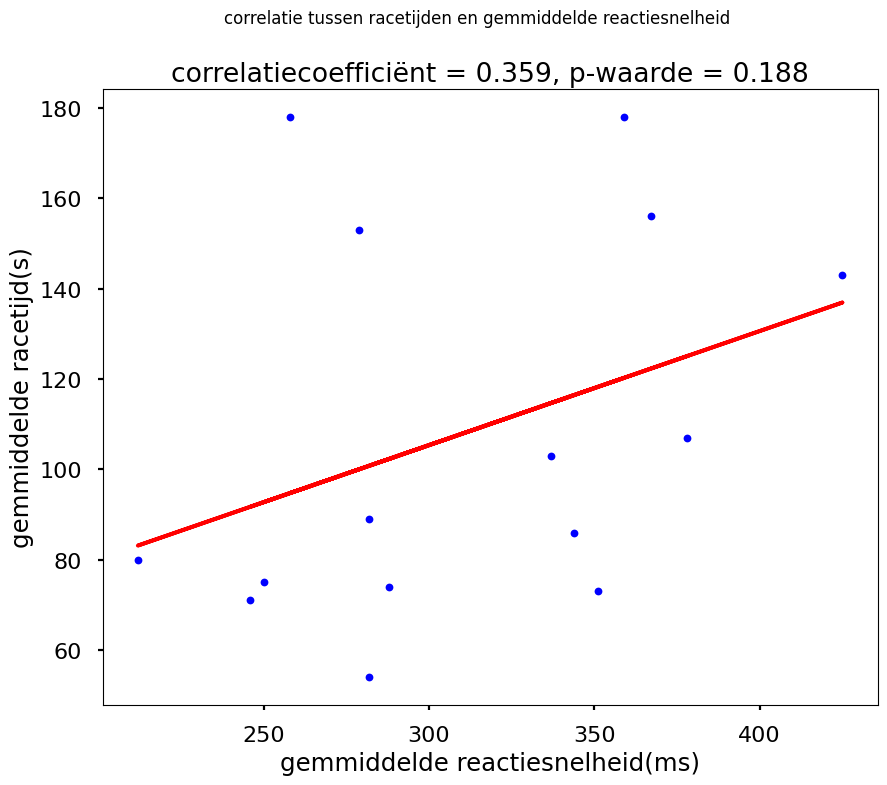

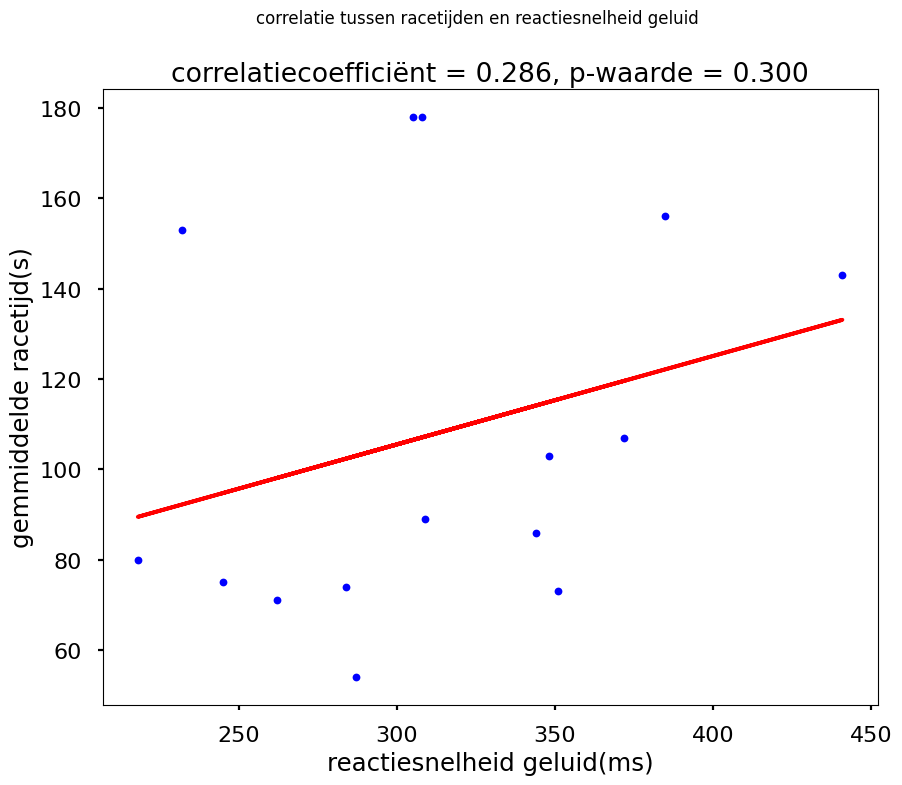

In [42]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

def scatter(dfx, dfy, xtitle = "x", ytitle = "y", title = ""):
    x = df[dfx]
    y = df[dfy]
    # assemble matrix A
    A = np.vstack([x, np.ones(len(x))]).T

    correlation,pv =corrsys(df[[dfx, dfy]])
    # Direct least square regression
    alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

    # plot the results
    plt.figure(figsize = (10,8))
    plt.plot(x, y, 'b.')
    plt.plot(x, alpha[0]*x + alpha[1], 'r')
    plt.suptitle(title)
    plt.title(f'correlatiecoefficiënt = {numberWithoutRounding(correlation)}, p-waarde = {numberWithoutRounding(pv)}')
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.show()

scatter("reactiesnelheid geluid", "reactiesnelheid kleur", "reactiesnelheid geluid(ms)", "reactiesnelheid kleur(ms)", "correlatie tussen de reactiesnelheden")
scatter("reactiesnelheid kleur", "avg tijd", "reactiesnelheid kleur(ms)", "gemmiddelde racetijd(s)", "correlatie tussen racetijden en reactiesnelheid kleur")
scatter("rea gem", "avg tijd", "gemmiddelde reactiesnelheid(ms)", "gemmiddelde racetijd(s)", "correlatie tussen racetijden en gemmiddelde reactiesnelheid")
scatter("reactiesnelheid geluid", "avg tijd", "reactiesnelheid geluid(ms)", "gemmiddelde racetijd(s)", "correlatie tussen racetijden en reactiesnelheid geluid")

## the maths:
### calculating the correlation and p-value:

#### formula for calculating the correlationcoëfficiënt:

given values:

$$ alpha = \frac{\text{count}}{2} -1 $$
 
$$ x = \frac{\text{correl} + 1}{2} $$

we can calculate the $p$-value using scipi:

$$ p = 2 \times \text{scipy.special.betainc(alpha, alpha, x)} $$

which internally uses the formula:

$$ p = 2 \times \int_0^\text{x} t^{\text{alpha} -1}(1-t)^{\text{alpha} - 1} , dt $$

### function for calculating everything:


In [ ]:


def corr1(df):
    mask = df.notna().to_numpy()
    corr = df.corr().to_numpy()
    n_rows, n_cols = df.shape

    # Initialize the return arrays for better performance
    length = int(n_cols * (n_cols - 1) / 2)
    correl = np.empty(length, dtype=np.float64)
    count = np.empty(length, dtype=np.uint64)

    # For 2-combination of columns, let `n` be the number of pairs whose
    # elements are all non-NaN. We will need that later to calculate the
    # p-value
    k = -1
    for i in range(n_cols):
        for j in range(i):
            n = 0
            for row in range(n_rows):
                n += 1 if mask[row, i] and mask[row, j] else 0

            k += 1
            correl[k] = corr[i,j]
            count[k] = n
            

    # The p-value can be obtained with the incomplete Beta function (betainc)
    alpha = count / 2 - 1
    x = (correl + 1) / 2
    x = np.where(correl < 0, x, 1 - x)
    p = 2 * scipy.special.betainc(alpha, alpha, x)

    confidence = numberWithoutRounding(100 - ((p[0])*100), precision= 2)
    col_a, col_b = df.columns
    print(f"Data van het vergelijken van {col_a} en {col_b}:")
    print(f'De bevonden correlatiecoëfficiënt is: {numberWithoutRounding(correl[0])}. ')
    print(f'En een bevonden p waarde van: {numberWithoutRounding(p[0])}.')
    print(f"Er is dus een {confidence}% kans dat er een correlatie is.")
    if p <= 0.05:
        print("Deze bevindingen zijn statistisch significant.")
    else:
        print("Helaas zijn de bevindingen niet statistisch significant.")
    print("")
    print("")
    


### calling the function with different data sets:

In [ ]:
corr1(df[['reactiesnelheid geluid','reactiesnelheid kleur']])
corr1(df[['reactiesnelheid geluid','avg tijd']])
corr1(df[['reactiesnelheid kleur','avg tijd']])
corr1(df[["leeftijd", 'avg tijd']])
corr1(df[["leeftijd", "reactiesnelheid kleur"]])
corr1(df[["leeftijd", "reactiesnelheid geluid"]])

Data van het vergelijken van reactiesnelheid geluid en reactiesnelheid kleur:
De bevonden correlatiecoëfficiënt is: 0.687. 
En een bevonden p waarde van: 0.004.
Er is dus een 99.53% kans dat er een correlatie is.
Deze bevindingen zijn statistisch significant.


Data van het vergelijken van reactiesnelheid geluid en avg tijd:
De bevonden correlatiecoëfficiënt is: 0.286. 
En een bevonden p waarde van: 0.300.
Er is dus een 69.95% kans dat er een correlatie is.
Helaas zijn de bevindingen niet statistisch significant.


Data van het vergelijken van reactiesnelheid kleur en avg tijd:
De bevonden correlatiecoëfficiënt is: 0.370. 
En een bevonden p waarde van: 0.173.
Er is dus een 82.64% kans dat er een correlatie is.
Helaas zijn de bevindingen niet statistisch significant.


Data van het vergelijken van leeftijd en avg tijd:
De bevonden correlatiecoëfficiënt is: -0.119. 
En een bevonden p waarde van: 0.671.
Er is dus een 32.84% kans dat er een correlatie is.
Helaas zijn de bevindingen niet st

## credits:
### function to calculate p-value and correlation:
https://stackoverflow.com/questions/64682256/how-to-calculate-a-correlation-with-p-values-most-performant-in-python
by: https://stackoverflow.com/users/2538939/code-different
### rounding function:
https://stackoverflow.com/questions/60250522/how-to-show-exactly-4-numbers-after-decimal-point-without-rounding-in-python
by: https://stackoverflow.com/users/4091874/caseygrun